In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
#bring in csv of spot rates
spot_rates = pd.read_csv("spot_rates.csv")
spot_rates.head()

list_of_rates = ['AUJPYSP', 'AUUSDSP', 'AUGBPSP', 'AUMYRSP', 'AUEU.SP', 'AUNZDSP']

In [3]:
#get doy-on-day log returns of spot prices output into data frame 
spot_returns = pd.DataFrame()
for x in list_of_rates:
    #percentage returns commented below 
    #spot_returns[x + '_pct_return'] = spot_rates[x].pct_change()
    spot_returns[x + '_log_return'] = np.log(spot_rates[x]).diff()
    
spot_returns.columns = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
spot_returns.head(10)

,JPY,USD,GBP,MYR,EUR,NZD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014596,0.005757,-0.007325,0.007630,0.021320,0.007832
2,0.030557,0.020315,0.031631,0.022749,0.019120,0.001161
3,0.012901,0.001826,-0.008994,0.008404,0.025635,0.009160
4,0.021336,0.013801,-0.003909,0.011506,0.016794,-0.007007
5,-0.036838,-0.023392,-0.035673,-0.013711,-0.032135,-0.004976
6,-0.011709,0.001982,-0.005570,0.005084,0.001159,-0.008097
7,-0.035811,-0.023036,-0.016461,-0.014722,-0.004062,-0.010955
8,-0.028511,-0.019438,0.001528,-0.017495,-0.015035,0.021376
9,-0.003642,-0.005772,0.009549,-0.008157,-0.000394,0.007684


In [4]:
#create covarience matrix 
cov_matrix = spot_returns.cov()
cov_matrix

,JPY,USD,GBP,MYR,EUR,NZD
JPY,0.000081,0.000048,0.000030,0.000030,0.000032,0.000009
USD,0.000048,0.000051,0.000030,0.000032,0.000027,0.000007
GBP,0.000030,0.000030,0.000044,0.000021,0.000026,0.000008
MYR,0.000030,0.000032,0.000021,0.000032,0.000020,0.000006
EUR,0.000032,0.000027,0.000026,0.000020,0.000039,0.000009
NZD,0.000009,0.000007,0.000008,0.000006,0.000009,0.000021


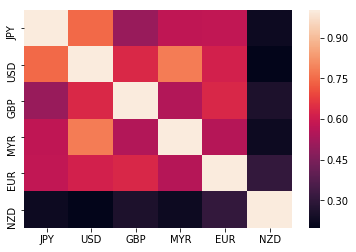

In [5]:
#correation matrix 
corr_matrix = spot_returns.corr()
corr_matrix

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns);

In [6]:
Portfolio = pd.read_csv("spot_portfolio.csv")

In [7]:
Portfolio

,Currency,AUD equvalents,ABS value,p_weight
0,USD,20,20,0.148148
1,GBP,-15,15,0.111111
2,EUR,25,25,0.185185
3,JPY,-30,30,0.222222
4,NZD,25,25,0.185185
5,MYR,-20,20,0.148148


In [8]:
X_Vector = [-30000000, 20000000, -15000000, -20000000, 25000000, 25000000]

Covar_X = cov_matrix.dot(X_Vector)

X_Covar_X = Covar_X.dot(X_Vector)

X_Covar_X

58545599277.80732

In [9]:
sqrt_covar = np.sqrt(X_Covar_X)
sqrt_covar*1.645

398027.4554421197

In [10]:
np.mean(spot_returns['JPY'])

5.569086119784732e-05

In [11]:
curr = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
mean_rets = {}
for x in curr:
    mean_rets[x] = np.mean(spot_returns[x])
    
mean_rets

{'JPY': 5.569086119784732e-05,
 'USD': -6.115685787646584e-06,
 'GBP': 5.774672615907859e-05,
 'MYR': 5.921647248838025e-05,
 'EUR': 8.077564935282384e-05,
 'NZD': -4.980751122065967e-05}

In [12]:
std_rets = {}
for x in curr:
    std_rets[x] = np.std(spot_returns[x])
    
std_rets

{'JPY': 0.009006444731635936,
 'USD': 0.007141994831460912,
 'GBP': 0.006652911018841816,
 'MYR': 0.005688550236269072,
 'EUR': 0.006215485106321001,
 'NZD': 0.00460082447983214}

In [96]:
np.random.seed(42)
n_sims = 100000
sim_returns = pd.DataFrame()
smean = {}
sim_std ={}

for x in curr:
    sim_returns[x] = np.random.normal(mean_rets[x], std_rets[x], n_sims)
    smean[x] = np.mean(sim_returns[x])
    sim_std[x] = np.std(sim_returns[x])

In [97]:
sim_returns.tail()

,JPY,USD,GBP,MYR,EUR,NZD
99995,-0.001973,-0.009038,-0.002818,-0.003095,0.008370,0.000459
99996,-0.005076,0.004034,-0.004516,-0.013118,-0.000601,-0.003658
99997,0.003741,0.001137,-0.004464,0.004790,-0.001434,-0.000738
99998,-0.001845,0.006105,-0.007075,0.002690,-0.004876,-0.000458
99999,0.001137,-0.007612,-0.002323,-0.000722,-0.010120,-0.000223


In [15]:
spot_price = {'JPY': 72.97, 'USD': 0.6812, 'GBP': 0.5625, 'MYR': 2.8290, 'EUR': 0.6148, 'NZD': 1.0419}
spot_price

{'JPY': 72.97,
 'USD': 0.6812,
 'GBP': 0.5625,
 'MYR': 2.829,
 'EUR': 0.6148,
 'NZD': 1.0419}

In [16]:
sim_spot_price = pd.DataFrame()
Curr_Vector = {'JPY':-30000000, 'USD':20000000, 'GBP':-15000000, 'MYR':-20000000, 'EUR':25000000, 'NZD':25000000}

for x in curr:
    sim_spot_price[x] = ((1 + sim_returns[x]) * Curr_Vector[x])

In [17]:
sim_spot_price['Portfolio'] = sim_spot_price['JPY'] + sim_spot_price['USD'] + sim_spot_price['GBP'] + sim_spot_price['MYR'] + sim_spot_price['EUR'] + sim_spot_price['NZD']

In [18]:
sim_spot_price['PnL'] = sim_spot_price['Portfolio'] - 5000000 #Mtm
sim_spot_price

,JPY,USD,GBP,MYR,EUR,NZD,Portfolio,PnL
0,-3.013588e+07,2.014709e+07,-1.515673e+07,-1.984193e+07,2.547369e+07,2.487649e+07,5.362725e+06,362725.443978
1,-2.996431e+07,1.983485e+07,-1.499146e+07,-2.006351e+07,2.497901e+07,2.490441e+07,4.698977e+06,-301023.428958
2,-3.017667e+07,2.008207e+07,-1.486819e+07,-1.998745e+07,2.473293e+07,2.507734e+07,4.860036e+06,-139963.944435
3,-3.041318e+07,1.991143e+07,-1.486229e+07,-1.996896e+07,2.508205e+07,2.504682e+07,4.795868e+06,-204131.882595
4,-2.993840e+07,1.995311e+07,-1.496667e+07,-2.008851e+07,2.499211e+07,2.504735e+07,4.998985e+06,-1014.743407
5,-2.993841e+07,2.000668e+07,-1.484314e+07,-1.995173e+07,2.502647e+07,2.494284e+07,5.242701e+06,242701.249331
6,-3.042836e+07,1.998281e+07,-1.505946e+07,-2.005326e+07,2.502569e+07,2.497511e+07,4.442527e+06,-557473.412234
7,-3.020903e+07,1.976046e+07,-1.502064e+07,-1.994518e+07,2.509844e+07,2.484941e+07,4.533465e+06,-466535.390017
8,-2.987482e+07,2.019726e+07,-1.500581e+07,-2.002966e+07,2.479995e+07,2.525177e+07,5.338694e+06,338694.017616
9,-3.014827e+07,2.016192e+07,-1.493906e+07,-1.991085e+07,2.516699e+07,2.514292e+07,5.473648e+06,473648.361311


In [19]:
PnL = np.array(sim_spot_price['PnL'])
PnL.sort()

In [20]:
PnL[5000]

-648506.6649415232

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


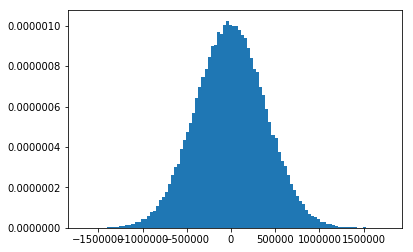

In [21]:
import matplotlib.pyplot as plt
x = PnL
plt.hist(x, normed=True, bins=100);

In [22]:
np.percentile(PnL, 5)

-648507.2484624723

In [23]:
hist_port_returns = pd.DataFrame()
for x in curr:
    hist_port_returns[x] = (1+spot_returns[x]) * Curr_Vector[x]
    
hist_port_returns.drop(hist_port_returns.index[0])
hist_port_returns

,JPY,USD,GBP,MYR,EUR,NZD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.043789e+07,2.011514e+07,-1.489013e+07,-2.015260e+07,2.553300e+07,2.519580e+07
2,-3.091671e+07,2.040629e+07,-1.547446e+07,-2.045498e+07,2.547799e+07,2.502903e+07
3,-3.038704e+07,2.003653e+07,-1.486508e+07,-2.016809e+07,2.564088e+07,2.522899e+07
4,-3.064008e+07,2.027602e+07,-1.494136e+07,-2.023012e+07,2.541986e+07,2.482484e+07
5,-2.889486e+07,1.953216e+07,-1.446490e+07,-1.972578e+07,2.419662e+07,2.487561e+07
6,-2.964874e+07,2.003964e+07,-1.491645e+07,-2.010168e+07,2.502897e+07,2.479759e+07
7,-2.892567e+07,1.953929e+07,-1.475308e+07,-1.970557e+07,2.489846e+07,2.472613e+07
8,-2.914468e+07,1.961124e+07,-1.502291e+07,-1.965010e+07,2.462413e+07,2.553441e+07
9,-2.989073e+07,1.988456e+07,-1.514323e+07,-1.983687e+07,2.499016e+07,2.519209e+07


In [24]:
hist_port_returns['Portfolio'] = hist_port_returns['JPY'] + hist_port_returns['USD'] + hist_port_returns['GBP'] + hist_port_returns['MYR'] + hist_port_returns['EUR'] + hist_port_returns['NZD']

In [25]:
hist_port_returns['PnL'] = hist_port_returns['Portfolio'] - 5000000

c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mat\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


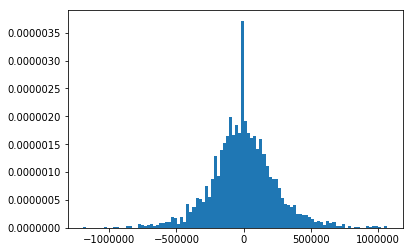

In [26]:
plt.hist(hist_port_returns['PnL'], normed=True, bins=100);

In [27]:
array = np.array(hist_port_returns['PnL'])

In [28]:
array = array[np.logical_not(np.isnan(array))]
np.percentile(array, 5)

-384873.90879832953

In [29]:
hist_port_returns['Log_returns'] = np.log(hist_port_returns['Portfolio']).diff()

In [30]:
hist_port_returns.loc[2: ,'Log_returns']

2      -0.276636
3       0.299286
4      -0.152726
5       0.158662
6      -0.059639
7       0.105798
8       0.029412
9      -0.135854
10      0.151894
11     -0.345819
12      0.045643
13      0.268281
14     -0.156638
15      0.001247
16      0.025626
17     -0.028682
18     -0.087589
19      0.130631
20      0.065314
21      0.046975
22     -0.037369
23     -0.240915
24      0.081820
25      0.124091
26     -0.127139
27     -0.168298
28      0.257185
29     -0.044429
30     -0.028686
31     -0.016163
          ...   
2732   -0.039495
2733    0.029181
2734   -0.040698
2735    0.006849
2736    0.049257
2737   -0.015131
2738    0.023873
2739    0.003594
2740   -0.030987
2741    0.026028
2742   -0.013933
2743   -0.017385
2744    0.013852
2745    0.018717
2746   -0.029332
2747    0.016812
2748   -0.023025
2749    0.011095
2750    0.017985
2751   -0.008036
2752   -0.019384
2753    0.032238
2754    0.026467
2755   -0.028627
2756   -0.029535
2757    0.022024
2758   -0.069410
2759    0.0828

In [31]:
hmean = np.mean(hist_port_returns.loc[2: ,'Log_returns'])
hstd = np.std(hist_port_returns.loc[2: ,'Log_returns'])
np.random.seed(42)
n_sims = 100000
hsim_returns = np.random.normal(hmean, hstd, n_sims)
hsmean  = np.mean(hsim_returns)
hsim_std = np.std(hsim_returns)

In [32]:
simVAR = 5000000*np.percentile(hsim_returns, 5) 
simVAR

-578217.0667840239

In [85]:
L = np.linalg.cholesky(cov_matrix)

In [86]:
L

array([[0.00900808, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00534655, 0.00473719, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00335038, 0.00258973, 0.00513279, 0.        , 0.        ,
        0.        ],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.        ,
        0.        ],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [65]:
yeet = pd.DataFrame()



for x in list(range(99998):
    yeet = L.dot(np.array(sim_returns.loc[x, :]))


SyntaxError: invalid syntax (<ipython-input-65-b60ffe93f3d9>, line 5)

In [61]:
np.array(sim_returns.loc[2, :])

array([ 0.00588906,  0.00410365, -0.00878754, -0.00062775, -0.01068294,
        0.00309361])

In [91]:
for r_index, row in enumerate(L):
    for c_index, col in enumerate(row):
        # ensures we're in the bottom half of the board
        if c_index <= len(L[0])/2 or r_index <= len(L)/2:
            L[r_index][c_index] = L[c_index][r_index]

In [51]:
L

array([[0.00900808, 0.00534655, 0.00335038, 0.00328318, 0.00360341,
        0.0010402 ],
       [0.00534655, 0.00473719, 0.00258973, 0.00298379, 0.0017267 ,
        0.00021023],
       [0.00335038, 0.00258973, 0.00513279, 0.0004111 , 0.00187957,
        0.00077107],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.00055656,
        0.00045162],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [92]:
yeet = []
yikes = []
for x in list(range(0,99998)):
    yikes = L.dot(np.array(sim_returns.loc[x, :]))
    yeet.append(yikes)
    yikes = []

In [93]:
ooft = pd.DataFrame(yeet)
ooft * X_Vector

,0,1,2,3,4,5
0,-4569.426481,1884.179920,-1746.077858,-429.155758,3162.398862,56.095073
1,1600.500757,-794.616320,472.696039,394.733547,-537.300340,-478.079583
2,-246.298581,169.993793,490.480008,-423.938642,-873.155426,151.427814
3,-2349.223678,606.221264,82.097715,-508.207417,952.668559,399.245805
4,693.320410,-295.581420,325.020443,-33.786715,-363.215915,141.259542
5,1746.969246,-846.611725,906.816405,380.526840,-580.630990,-510.183611
6,-4461.619392,1840.948689,-1023.277149,-1109.800616,1584.034843,382.907395
7,-67.904170,-371.330103,-15.303453,450.457521,564.442872,-471.796251
8,-88.576201,362.813271,-103.266139,-424.601882,-779.561901,922.457417
9,-2687.196772,1073.773084,-477.011494,-584.784630,1266.525750,775.688382


In [89]:
L

array([[0.00900808, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00534655, 0.00473719, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00335038, 0.00258973, 0.00513279, 0.        , 0.        ,
        0.        ],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.        ,
        0.        ],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [98]:
sim_returns1 = pd.DataFrame()
for x in curr:
    sim_returns1[x] = np.random.normal(0, 1, n_sims)
    


,JPY,USD,GBP,MYR,EUR,NZD
0,1.826236,-0.277751,0.676414,2.613356,0.169172,-0.070364
1,-0.110194,0.160983,0.519750,0.168215,-0.121505,-0.665927
2,-0.727344,0.108519,0.502574,-1.798394,1.156625,1.319857
3,-0.360672,0.530888,-0.187128,-0.104000,0.200086,0.143504
4,1.439711,0.008306,0.339647,0.624774,0.864611,-1.478138
5,0.784337,0.017784,1.657070,0.119093,1.405783,-0.413736
6,0.684573,-0.428372,-2.064589,0.351945,0.532270,-0.264883
7,-0.644308,-0.003939,1.200492,-0.002247,-0.479221,0.325316
8,0.591650,2.742136,-0.878806,1.259612,-0.944669,-1.156100
9,0.693324,-0.103603,-0.797707,0.873326,-1.671735,-0.328301


In [99]:
yeet = []
yikes = []
for x in list(range(0,99998)):
    yikes = L.dot(np.array(sim_returns1.loc[x, :]))
    yeet.append(yikes)
    yikes = []
    
ooft = pd.DataFrame(yeet)

ooft

,0,1,2,3,4,5
0,0.026349,0.018275,0.010209,0.014755,0.009561,0.003353
1,0.001031,0.001672,0.002043,0.000559,0.000424,-0.002573
2,-0.004652,-0.005165,0.002876,-0.006981,0.002530,0.005350
3,-0.000509,0.000167,-0.000350,0.000131,0.000076,0.000304
4,0.017781,0.011663,0.007331,0.006916,0.009941,-0.003774
5,0.017739,0.011265,0.013551,0.004326,0.012139,0.001316
6,-0.000243,-0.001802,-0.008472,0.001543,0.000353,-0.001596
7,-0.003199,-0.001120,0.003342,-0.001761,-0.002153,0.001337
8,0.016575,0.015762,0.002424,0.013172,0.001816,-0.004572
9,-0.000479,0.000800,-0.005076,0.003651,-0.005950,-0.002084


In [101]:
jeeve = pd.DataFrame()
jeeve = (1 + ooft) * X_Vector
jeeve

,0,1,2,3,4,5
0,-3.079046e+07,2.036550e+07,-1.515314e+07,-2.029509e+07,2.523903e+07,2.508383e+07
1,-3.003094e+07,2.003343e+07,-1.503064e+07,-2.001118e+07,2.501060e+07,2.493567e+07
2,-2.986045e+07,1.989671e+07,-1.504314e+07,-1.986038e+07,2.506325e+07,2.513376e+07
3,-2.998474e+07,2.000335e+07,-1.499475e+07,-2.000262e+07,2.500190e+07,2.500759e+07
4,-3.053342e+07,2.023326e+07,-1.510996e+07,-2.013831e+07,2.524852e+07,2.490565e+07
5,-3.053216e+07,2.022530e+07,-1.520327e+07,-2.008653e+07,2.530348e+07,2.503290e+07
6,-2.999272e+07,1.996395e+07,-1.487292e+07,-2.003085e+07,2.500882e+07,2.496009e+07
7,-2.990404e+07,1.997759e+07,-1.505013e+07,-1.996477e+07,2.494617e+07,2.503343e+07
8,-3.049726e+07,2.031523e+07,-1.503636e+07,-2.026345e+07,2.504540e+07,2.488571e+07
9,-2.998562e+07,2.001601e+07,-1.492386e+07,-2.007301e+07,2.485126e+07,2.494791e+07


In [107]:
jeeve.columns = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']

jeeve['Portfolio'] = jeeve['JPY'] + jeeve['USD'] + jeeve['GBP'] + jeeve['MYR'] + jeeve['EUR'] + jeeve['NZD']

jeeve['PnL'] = jeeve['Portfolio'] - 5000000 #Mtm

jeeve

,JPY,USD,GBP,MYR,EUR,NZD,Portfolio,PnL
0,-3.079046e+07,2.036550e+07,-1.515314e+07,-2.029509e+07,2.523903e+07,2.508383e+07,4.449676e+06,-550323.802825
1,-3.003094e+07,2.003343e+07,-1.503064e+07,-2.001118e+07,2.501060e+07,2.493567e+07,4.906946e+06,-93054.490313
2,-2.986045e+07,1.989671e+07,-1.504314e+07,-1.986038e+07,2.506325e+07,2.513376e+07,5.329758e+06,329757.698730
3,-2.998474e+07,2.000335e+07,-1.499475e+07,-2.000262e+07,2.500190e+07,2.500759e+07,5.030719e+06,30718.539526
4,-3.053342e+07,2.023326e+07,-1.510996e+07,-2.013831e+07,2.524852e+07,2.490565e+07,4.605740e+06,-394260.486336
5,-3.053216e+07,2.022530e+07,-1.520327e+07,-2.008653e+07,2.530348e+07,2.503290e+07,4.739723e+06,-260277.175621
6,-2.999272e+07,1.996395e+07,-1.487292e+07,-2.003085e+07,2.500882e+07,2.496009e+07,5.036375e+06,36374.911053
7,-2.990404e+07,1.997759e+07,-1.505013e+07,-1.996477e+07,2.494617e+07,2.503343e+07,5.038244e+06,38243.662838
8,-3.049726e+07,2.031523e+07,-1.503636e+07,-2.026345e+07,2.504540e+07,2.488571e+07,4.449287e+06,-550712.717540
9,-2.998562e+07,2.001601e+07,-1.492386e+07,-2.007301e+07,2.485126e+07,2.494791e+07,4.832685e+06,-167315.277914


-391480.60615625605

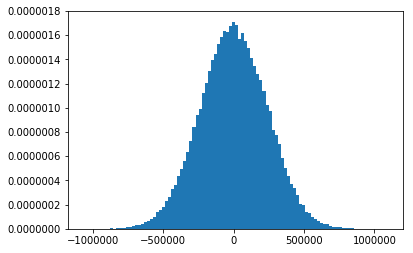

In [108]:
PnL2 = np.array(jeeve['PnL'])
PnL2.sort()
x = PnL2
plt.hist(x, normed=True, bins=100);
np.percentile(PnL2, 5)